In [30]:
import json
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from math import sqrt
import pickle


# Load DataSet

In [2]:
 # Load CSV into DataFrame
df = pd.read_csv('Cleaned_Tree_Dataset.csv')

In [3]:
df

,Unnamed: 0,No,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,...,PlantDate,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,Harvest
0,0,126,1,C,Acer saccharum,0.106,Med,2017,Prunus serotina,I,...,6/11/18,22.00,1.000000,-0.56,13.86,12.15,4,14.0,1.000000,X
1,1,11,1,C,Quercus alba,0.106,Med,2017,Quercus rubra,970,...,5/25/18,15.82,0.000000,5.19,20.52,19.29,33,115.5,0.000000,X
2,2,12,1,C,Quercus rubra,0.106,Med,2017,Prunus serotina,J,...,5/31/18,24.45,1.000000,3.36,24.74,15.01,18,63.0,1.000000,X
3,3,2823,7,D,Acer saccharum,0.080,Med,2016,Prunus serotina,J,...,6/11/18,22.23,1.000000,-0.71,14.29,12.36,4,14.0,1.000000,X
4,4,5679,14,A,Acer saccharum,0.060,Low,2017,Prunus serotina,689,...,6/11/18,21.15,1.000000,-0.58,10.85,11.20,4,14.0,1.000000,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2778,2778,7165,17,B,Prunus serotina,0.111,Med,2017,Populus grandidentata,891,...,6/7/18,40.89,1.000000,0.83,9.15,11.88,16,56.0,1.000000,X
2779,2779,7217,17,D,Quercus alba,0.118,Med,2017,Acer rubrum,1468,...,5/25/18,15.47,1.000000,4.88,19.01,23.50,16,56.0,1.000000,X
2780,2780,7306,17,D,Quercus alba,0.118,Med,2017,Quercus rubra,1454,...,5/25/18,11.96,1.000000,5.51,21.13,19.10,16,56.0,1.000000,X
2781,2781,7771,18,D,Quercus alba,0.161,High,2017,Sterile,1297,...,5/17/18,16.99,0.570453,4.28,19.38,21.36,33,115.5,0.570453,X


In [4]:
df.shape

(2783, 24)

In [5]:
df.columns

Index(['Unnamed: 0', 'No', 'Plot', 'Subplot', 'Species', 'Light_ISF',
       'Light_Cat', 'Core', 'Soil', 'Adult', 'Sterile', 'Conspecific', 'Myco',
       'SoilMyco', 'PlantDate', 'AMF', 'EMF', 'Phenolics', 'Lignin', 'NSC',
       'Census', 'Time', 'Event', 'Harvest'],
      dtype='object')

In [6]:
df.isnull().sum()

Unnamed: 0     0
No             0
Plot           0
Subplot        0
Species        0
Light_ISF      0
Light_Cat      0
Core           0
Soil           0
Adult          0
Sterile        0
Conspecific    0
Myco           0
SoilMyco       0
PlantDate      0
AMF            0
EMF            0
Phenolics      0
Lignin         0
NSC            0
Census         0
Time           0
Event          0
Harvest        0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2783.0,1391.000000,803.527224,0.000,695.500,1391.000,2086.500,2782.000
No,2783.0,3914.513834,2253.515063,3.000,1971.000,3932.000,5879.000,7772.000
Plot,2783.0,9.561624,5.203659,1.000,5.000,10.000,14.000,18.000
Light_ISF,2783.0,0.085707,0.025638,0.032,0.066,0.082,0.100,0.161
Core,2783.0,2016.648940,0.477387,2016.000,2016.000,2017.000,2017.000,2017.000
AMF,2783.0,20.553069,12.309587,0.000,13.400,18.000,24.445,100.000
EMF,2783.0,0.570453,0.495012,0.000,0.000,1.000,1.000,1.000
Phenolics,2783.0,1.933105,1.969842,-1.350,0.170,0.750,3.780,6.100
Lignin,2783.0,15.759792,6.779607,2.230,10.355,14.040,21.115,32.770
NSC,2783.0,14.219641,4.298271,4.300,11.605,12.660,17.275,29.450


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2783 entries, 0 to 2782
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   2783 non-null   int64  
 1   No           2783 non-null   int64  
 2   Plot         2783 non-null   int64  
 3   Subplot      2783 non-null   object 
 4   Species      2783 non-null   object 
 5   Light_ISF    2783 non-null   float64
 6   Light_Cat    2783 non-null   object 
 7   Core         2783 non-null   int64  
 8   Soil         2783 non-null   object 
 9   Adult        2783 non-null   object 
 10  Sterile      2783 non-null   object 
 11  Conspecific  2783 non-null   object 
 12  Myco         2783 non-null   object 
 13  SoilMyco     2783 non-null   object 
 14  PlantDate    2783 non-null   object 
 15  AMF          2783 non-null   float64
 16  EMF          2783 non-null   float64
 17  Phenolics    2783 non-null   float64
 18  Lignin       2783 non-null   float64
 19  NSC   

In [9]:
#dropping features that are not required
df.drop(['Unnamed: 0', 'Harvest'],axis = 1,inplace  = True)


In [10]:
# Extracting numerical features (both integer and float)
numerical_features = df.select_dtypes(include=['int', 'float'])

# Get the names of numerical feature columns
numerical_feature_columns = numerical_features.columns.tolist()

# Print the names of numerical feature columns
print("Numerical feature columns:")
print(numerical_feature_columns)

Numerical feature columns:
['No', 'Plot', 'Light_ISF', 'Core', 'AMF', 'EMF', 'Phenolics', 'Lignin', 'NSC', 'Census', 'Time', 'Event']


In [11]:
numerical_features.head()

,No,Plot,Light_ISF,Core,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event
0,126,1,0.106,2017,22.00,1.0,-0.56,13.86,12.15,4,14.0,1.0
1,11,1,0.106,2017,15.82,0.0,5.19,20.52,19.29,33,115.5,0.0
2,12,1,0.106,2017,24.45,1.0,3.36,24.74,15.01,18,63.0,1.0
3,2823,7,0.080,2016,22.23,1.0,-0.71,14.29,12.36,4,14.0,1.0
4,5679,14,0.060,2017,21.15,1.0,-0.58,10.85,11.20,4,14.0,1.0


In [12]:
numerical_features.columns

Index(['No', 'Plot', 'Light_ISF', 'Core', 'AMF', 'EMF', 'Phenolics', 'Lignin',
       'NSC', 'Census', 'Time', 'Event'],
      dtype='object')

# Univariate Analysis

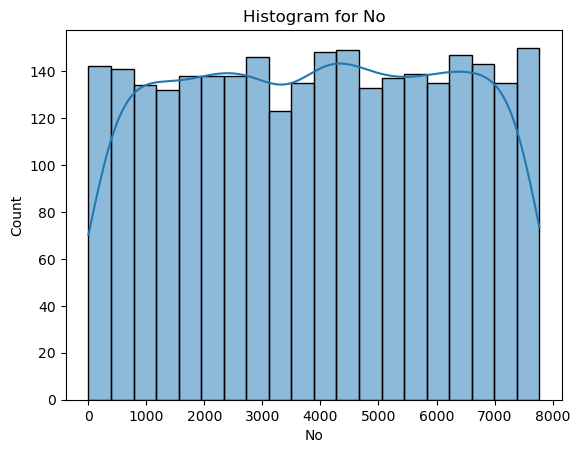

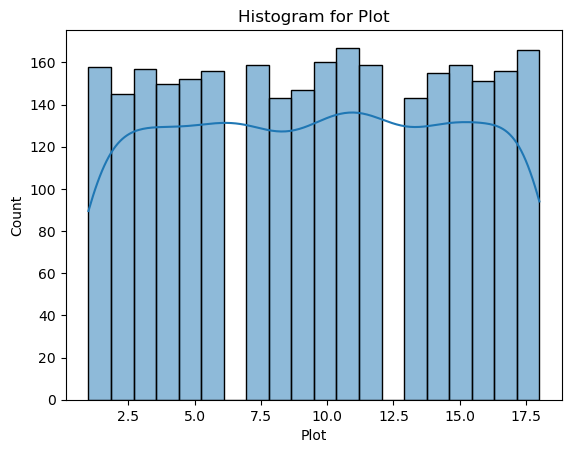

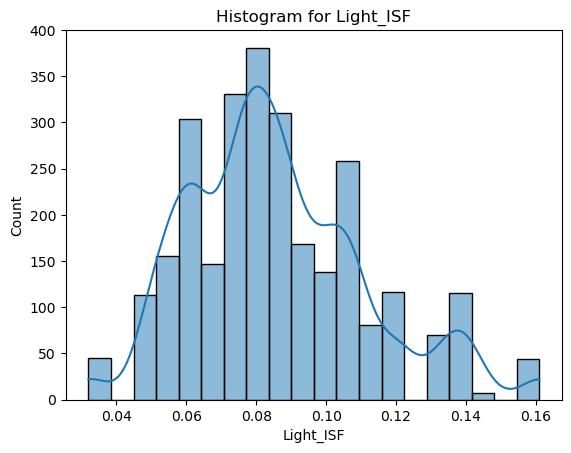

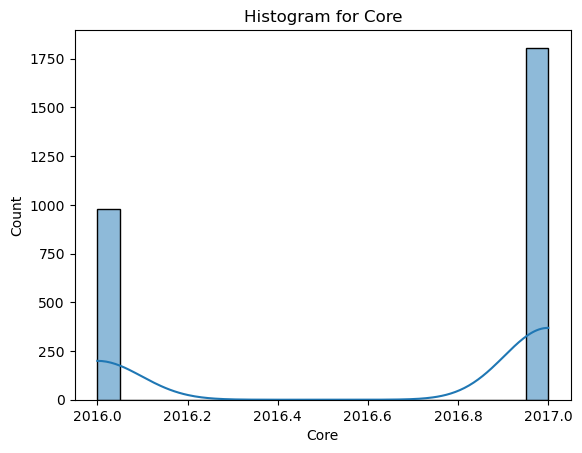

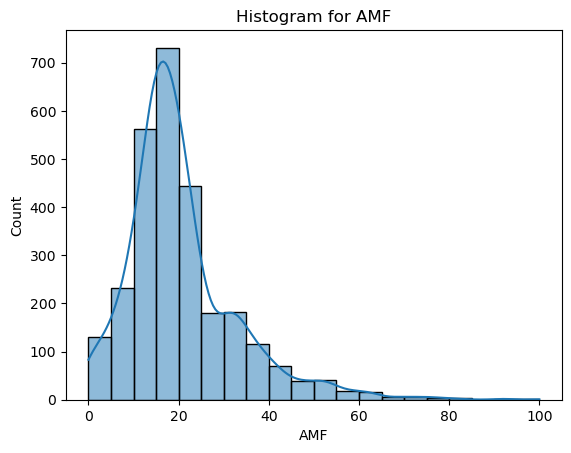

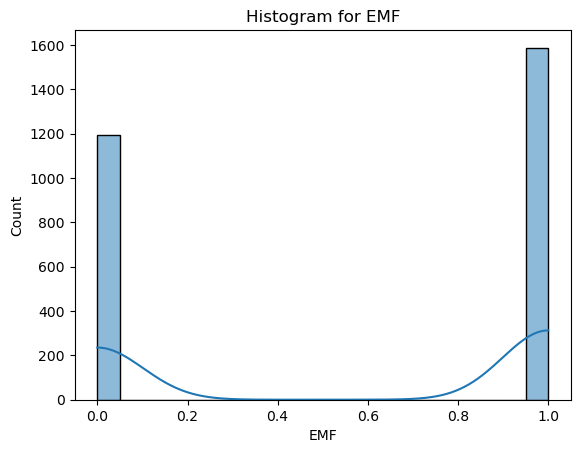

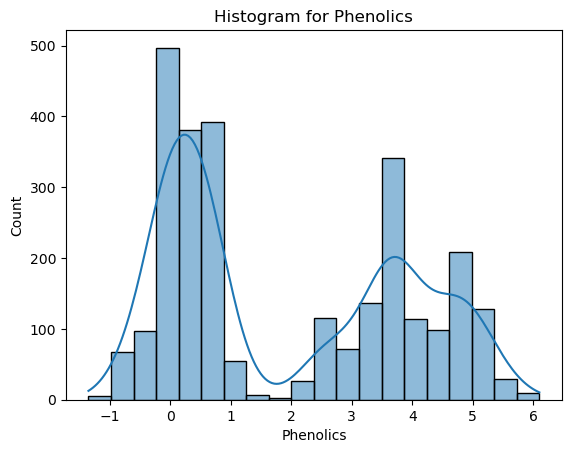

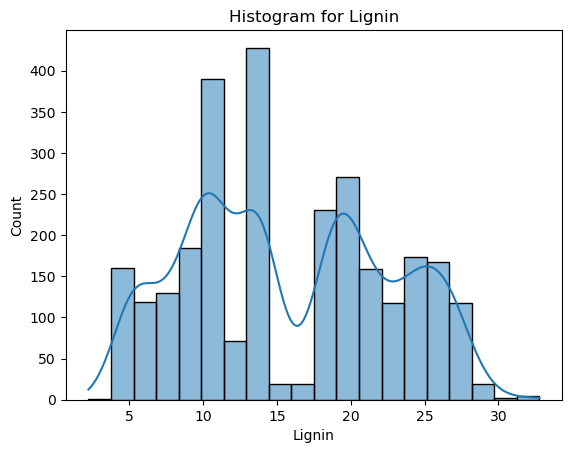

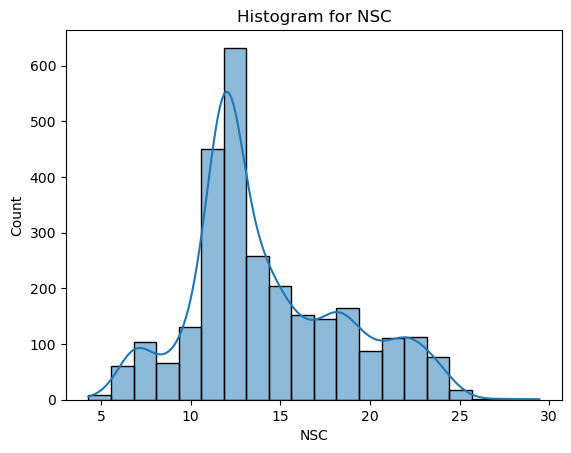

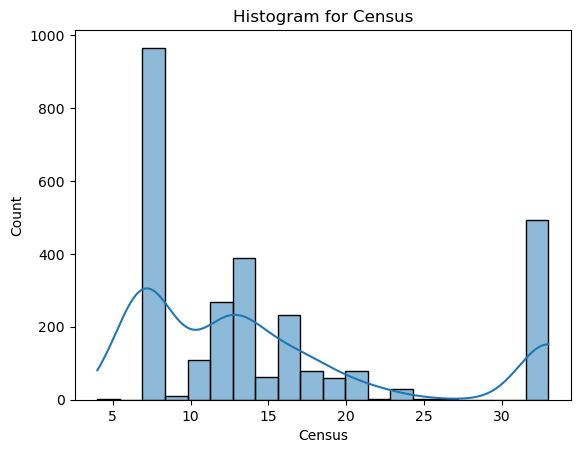

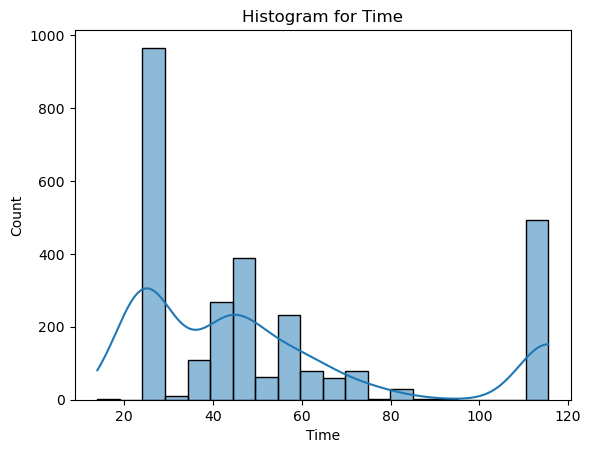

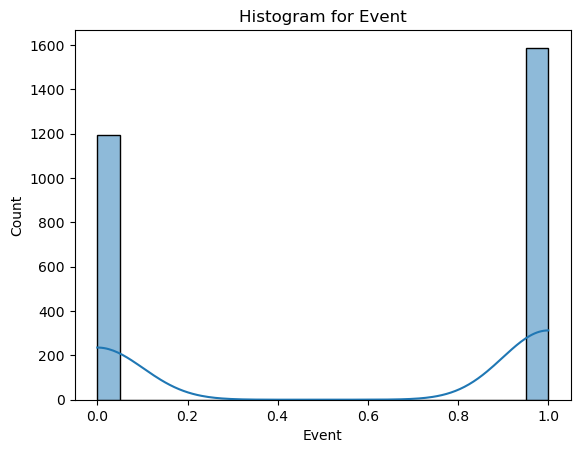

In [13]:
#checking the distribution for all numerical feature
for column in numerical_feature_columns:
    sn.histplot(df[column], kde=True, bins=20)  # Use displot or histplot
    plt.title(f'Histogram for {column}')
    plt.show()

In [14]:
#extracting our categorical features

categorical_feat = df.select_dtypes(include = 'object')
print(len(categorical_feat.columns))

10


In [15]:
categorical_feat.columns

Index(['Subplot', 'Species', 'Light_Cat', 'Soil', 'Adult', 'Sterile',
       'Conspecific', 'Myco', 'SoilMyco', 'PlantDate'],
      dtype='object')

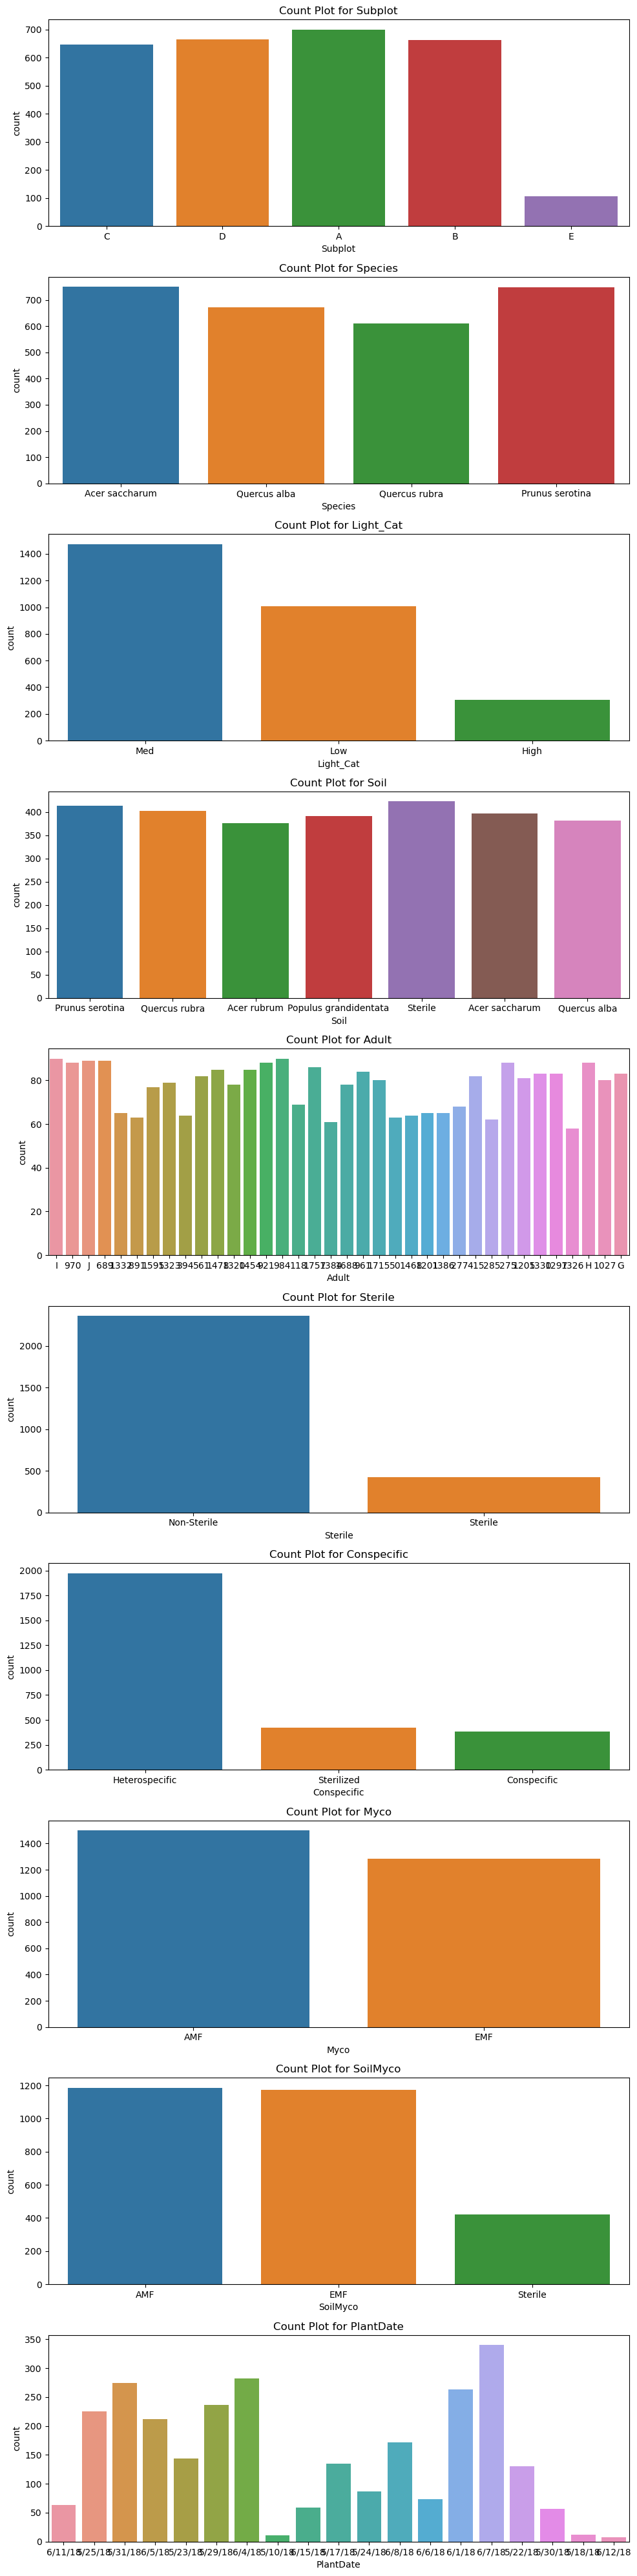

In [16]:
# Assuming df is your DataFrame
categorical_feat = ['Subplot', 'Species', 'Light_Cat', 'Soil', 'Adult', 'Sterile',
                    'Conspecific', 'Myco', 'SoilMyco', 'PlantDate']

# Set up subplots
fig, axes = plt.subplots(nrows=len(categorical_feat), ncols=1, figsize=(10, 4*len(categorical_feat)))

# Iterate through each categorical feature and create count plots
for i, feat in enumerate(categorical_feat):
    sn.countplot(x=feat, data=df, ax=axes[i])
    axes[i].set_title(f'Count Plot for {feat}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Bivariate Analysis 

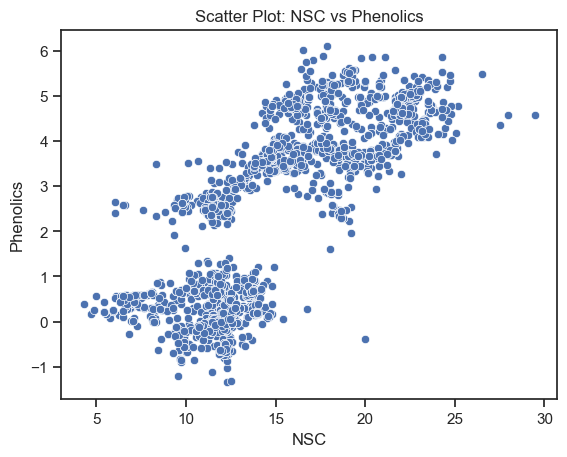

In [24]:
# Choose two variables for comparison
variable1 = 'NSC'
variable2 = 'Phenolics'

# Create a scatter plot
sn.scatterplot(x=variable1, y=variable2, data=df)
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.title(f'Scatter Plot: {variable1} vs {variable2}')
plt.show()

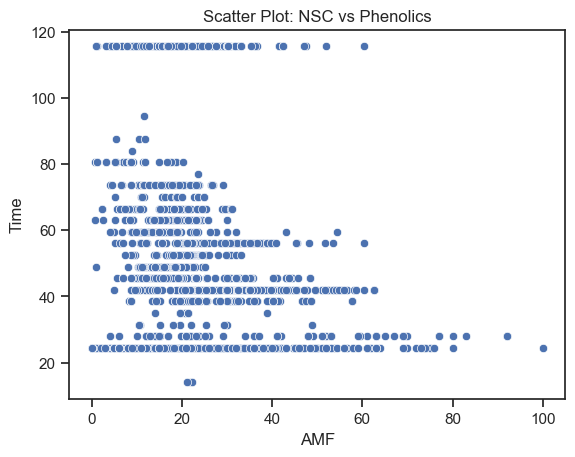

In [26]:
# Choose two different variables for comparison
variable3 = 'AMF'
variable4 = 'Time'

# Create a scatter plot
sn.scatterplot(x=variable3, y=variable4, data=df)
plt.xlabel(variable3)
plt.ylabel(variable4)
plt.title(f'Scatter Plot: {variable1} vs {variable2}')
plt.show()

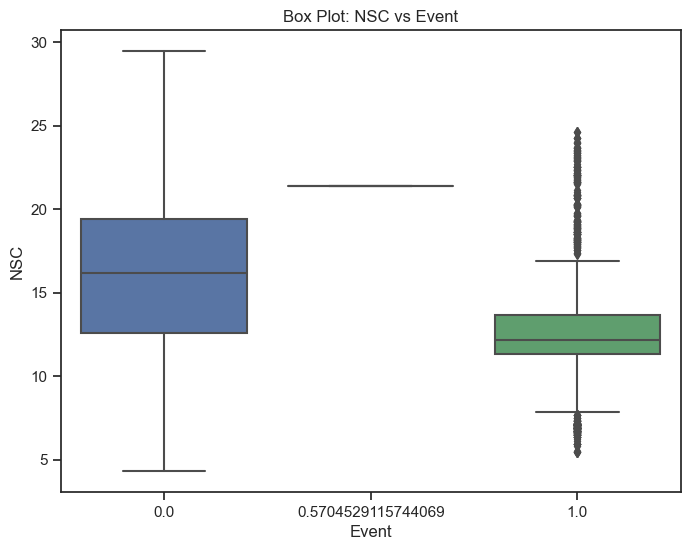

In [28]:
# Choose a numerical variable for comparison
variable = 'NSC'

# Create a box plot for 'Event' against the chosen variable
plt.figure(figsize=(8, 6))
sn.boxplot(x='Event', y=variable, data=df)
plt.xlabel('Event')
plt.ylabel(variable)
plt.title(f'Box Plot: {variable} vs Event')
plt.show()

# Multivariate Analysis

In [16]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

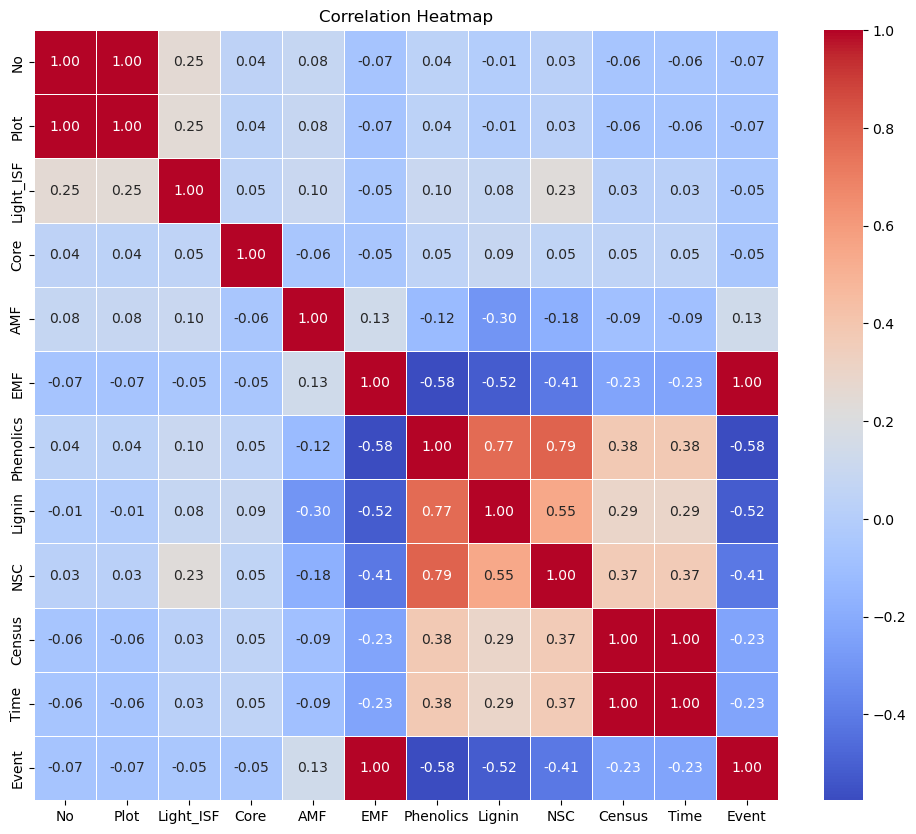

In [17]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [31]:
# No and plot ,EMF and Event, census and Time,

In [32]:
print(df['Conspecific'].unique())

['Heterospecific' 'Sterilized' 'Conspecific']


In [33]:
#dropping features that are correlated
df.drop(['No', 'EMF','Census'],axis = 1,inplace  = True)


In [34]:
df

,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,Conspecific,Myco,SoilMyco,PlantDate,AMF,Phenolics,Lignin,NSC,Time,Event
0,1,C,Acer saccharum,0.106,Med,2017,Prunus serotina,I,Non-Sterile,Heterospecific,AMF,AMF,6/11/18,22.00,-0.56,13.86,12.15,14.0,1.000000
1,1,C,Quercus alba,0.106,Med,2017,Quercus rubra,970,Non-Sterile,Heterospecific,EMF,EMF,5/25/18,15.82,5.19,20.52,19.29,115.5,0.000000
2,1,C,Quercus rubra,0.106,Med,2017,Prunus serotina,J,Non-Sterile,Heterospecific,EMF,AMF,5/31/18,24.45,3.36,24.74,15.01,63.0,1.000000
3,7,D,Acer saccharum,0.080,Med,2016,Prunus serotina,J,Non-Sterile,Heterospecific,AMF,AMF,6/11/18,22.23,-0.71,14.29,12.36,14.0,1.000000
4,14,A,Acer saccharum,0.060,Low,2017,Prunus serotina,689,Non-Sterile,Heterospecific,AMF,AMF,6/11/18,21.15,-0.58,10.85,11.20,14.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2778,17,B,Prunus serotina,0.111,Med,2017,Populus grandidentata,891,Non-Sterile,Heterospecific,AMF,EMF,6/7/18,40.89,0.83,9.15,11.88,56.0,1.000000
2779,17,D,Quercus alba,0.118,Med,2017,Acer rubrum,1468,Non-Sterile,Heterospecific,EMF,AMF,5/25/18,15.47,4.88,19.01,23.50,56.0,1.000000
2780,17,D,Quercus alba,0.118,Med,2017,Quercus rubra,1454,Non-Sterile,Heterospecific,EMF,EMF,5/25/18,11.96,5.51,21.13,19.10,56.0,1.000000
2781,18,D,Quercus alba,0.161,High,2017,Sterile,1297,Sterile,Sterilized,EMF,Sterile,5/17/18,16.99,4.28,19.38,21.36,115.5,0.570453


In [35]:
df.shape

(2783, 19)

In [36]:
df.columns

Index(['Plot', 'Subplot', 'Species', 'Light_ISF', 'Light_Cat', 'Core', 'Soil',
       'Adult', 'Sterile', 'Conspecific', 'Myco', 'SoilMyco', 'PlantDate',
       'AMF', 'Phenolics', 'Lignin', 'NSC', 'Time', 'Event'],
      dtype='object')

# Target variable

In [37]:
# Assuming df is your DataFrame and 'Event' is the column you want to convert
threshold = 0.5

In [38]:
# Convert 'Event' to binary format
df['EVENT'] = (df['Event'] > threshold).astype(int)

# Drop the original 'Event' column if needed
df.drop('Event', axis=1, inplace=True)


In [39]:
df.head()

,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,Conspecific,Myco,SoilMyco,PlantDate,AMF,Phenolics,Lignin,NSC,Time,EVENT
0,1,C,Acer saccharum,0.106,Med,2017,Prunus serotina,I,Non-Sterile,Heterospecific,AMF,AMF,6/11/18,22.00,-0.56,13.86,12.15,14.0,1
1,1,C,Quercus alba,0.106,Med,2017,Quercus rubra,970,Non-Sterile,Heterospecific,EMF,EMF,5/25/18,15.82,5.19,20.52,19.29,115.5,0
2,1,C,Quercus rubra,0.106,Med,2017,Prunus serotina,J,Non-Sterile,Heterospecific,EMF,AMF,5/31/18,24.45,3.36,24.74,15.01,63.0,1
3,7,D,Acer saccharum,0.080,Med,2016,Prunus serotina,J,Non-Sterile,Heterospecific,AMF,AMF,6/11/18,22.23,-0.71,14.29,12.36,14.0,1
4,14,A,Acer saccharum,0.060,Low,2017,Prunus serotina,689,Non-Sterile,Heterospecific,AMF,AMF,6/11/18,21.15,-0.58,10.85,11.20,14.0,1


In [40]:
# Step 1: Label encode categorical columns
label_encoder = LabelEncoder()

categorical_columns = ['Subplot', 'Species', 'Light_Cat', 'Soil', 'Adult', 
                       'Sterile', 'Conspecific', 'Myco', 'SoilMyco', 'PlantDate']

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])


In [41]:
# Step 1: Split the data into features (X) and target variable (y)
X = df.drop(['EVENT'], axis=1)  # Drop other unnecessary columns if needed
y = df['EVENT']

In [42]:
# Step 2: Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X, y)

# Step 3: Get feature importances
feature_importances = rf_classifier.feature_importances_

In [43]:
# Step 4: Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})



In [44]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

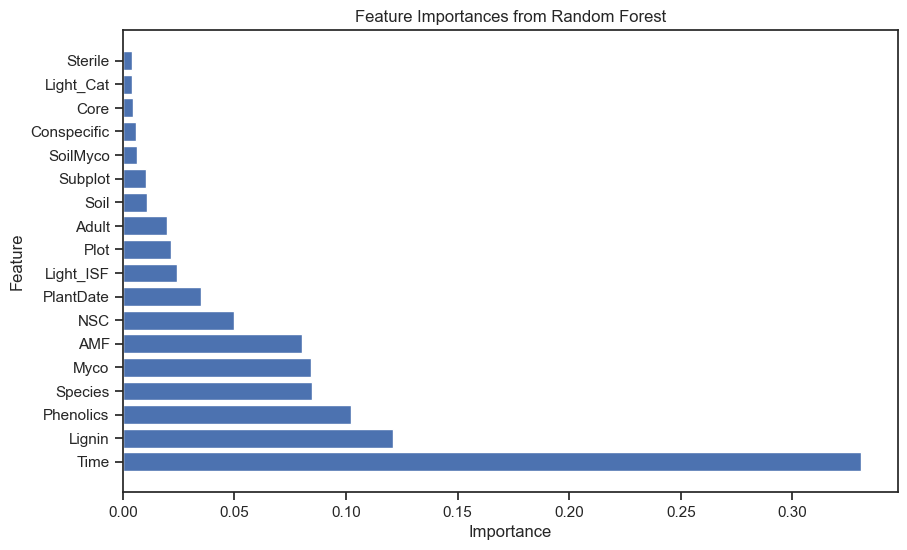

In [45]:
# Step 6: Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.show()

In [46]:
data=df.copy()

In [47]:
data=data.drop(['Sterile','Light_Cat','Core','Conspecific','SoilMyco','Subplot','Soil','Adult','Plot','Light_ISF','PlantDate'], axis=1)

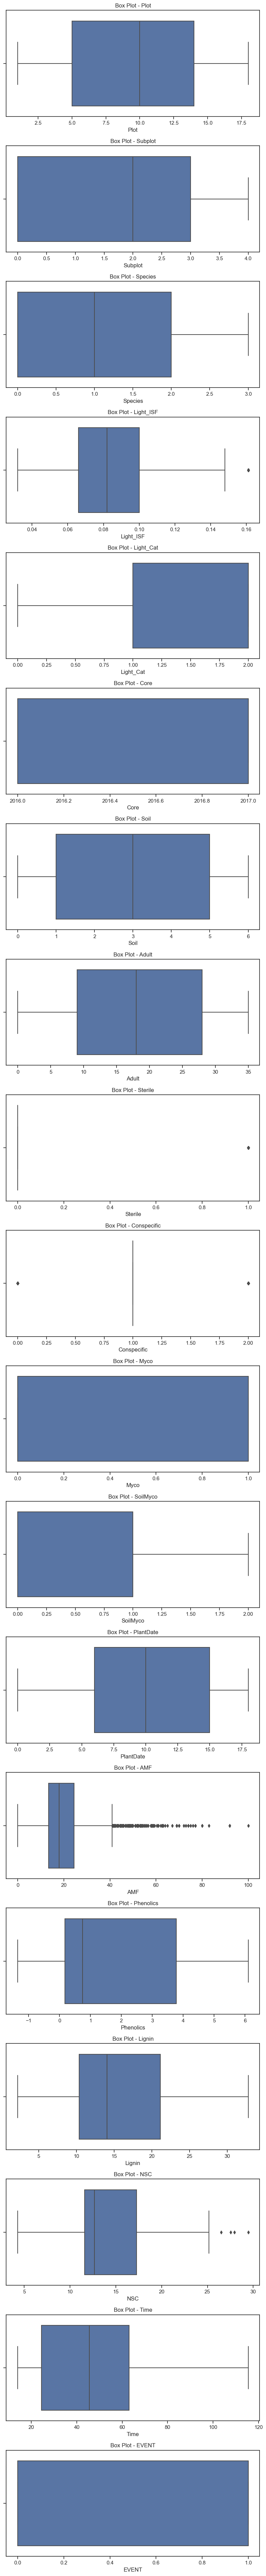

In [48]:
# Assuming df is your DataFrame
num_columns = len(df.columns)
num_rows = num_columns  # Set the number of rows to be equal to the number of columns

# Set the figure size based on the desired size for each column diagram
fig, axes = plt.subplots(num_rows, 1, figsize=(8, 4 * num_rows))

# Iterate through each column and create a box plot
for i, (column, ax) in enumerate(zip(df.columns, axes)):
    sn.boxplot(x=df[column], ax=ax)
    ax.set_title(f'Box Plot - {column}')

plt.tight_layout()
plt.show()

In [49]:
# Assuming df is your DataFrame
from scipy.stats import zscore
z_scores = pd.DataFrame(zscore(df), columns=df.columns)

# Define a threshold for outlier detection (e.g., 3 standard deviations)
threshold = 3

# Identify outliers for each column
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Display columns with outliers
columns_with_outliers = outliers.any()
print("Columns with outliers:")
print(columns_with_outliers[columns_with_outliers].index.tolist())

Columns with outliers:
['AMF', 'NSC']


#MODEL BUILDING

In [50]:
data

,Species,Myco,AMF,Phenolics,Lignin,NSC,Time,EVENT
0,0,0,22.00,-0.56,13.86,12.15,14.0,1
1,2,1,15.82,5.19,20.52,19.29,115.5,0
2,3,1,24.45,3.36,24.74,15.01,63.0,1
3,0,0,22.23,-0.71,14.29,12.36,14.0,1
4,0,0,21.15,-0.58,10.85,11.20,14.0,1
...,...,...,...,...,...,...,...,...
2778,1,0,40.89,0.83,9.15,11.88,56.0,1
2779,2,1,15.47,4.88,19.01,23.50,56.0,1
2780,2,1,11.96,5.51,21.13,19.10,56.0,1
2781,2,1,16.99,4.28,19.38,21.36,115.5,1


In [51]:
data.columns

Index(['Species', 'Myco', 'AMF', 'Phenolics', 'Lignin', 'NSC', 'Time',
       'EVENT'],
      dtype='object')

In [52]:
X = data.drop(['EVENT'], axis=1)  # Drop other unnecessary columns if needed
y = data['EVENT']

In [53]:
# Split the data into a training set and a test set
X_train ,X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2226, 7) (557, 7) (2226,) (557,)


In [55]:
# Define a StandardScaler
standard_scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = standard_scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = standard_scaler.transform(X_test)

# Logistic Regression

In [56]:
# Fit logistic regression to the training data
logistic_regression = LogisticRegression(max_iter=2000)  # Increased max_iter
logistic_regression.fit(X_train, y_train)

# Predictions on the training set
train_pred_logreg = logistic_regression.predict(X_train)

# Predictions on the testing set
test_pred_logreg = logistic_regression.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, train_pred_logreg)
test_accuracy = accuracy_score(y_test, test_pred_logreg)

confusion_mat = confusion_matrix(y_test, test_pred_logreg)
classification_rep = classification_report(y_test, test_pred_logreg)

print("Logistic Regression Training Accuracy:", train_accuracy)
print("Logistic Regression Testing Accuracy:", test_accuracy)
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", classification_rep)

Logistic Regression Training Accuracy: 0.7946990116801438
Logistic Regression Testing Accuracy: 0.8330341113105925
Confusion Matrix:
 [[195  31]
 [ 62 269]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.86      0.81       226
           1       0.90      0.81      0.85       331

    accuracy                           0.83       557
   macro avg       0.83      0.84      0.83       557
weighted avg       0.84      0.83      0.83       557



# Random Forest

In [57]:
# Initialize the Random Forest Classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
random_forest_classifier.fit(X_train, y_train)

# Predictions on the training set
train_pred_rf = random_forest_classifier.predict(X_train)

# Predictions on the testing set
test_pred_rf = random_forest_classifier.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, train_pred_rf)
test_accuracy = accuracy_score(y_test, test_pred_rf)

confusion_mat = confusion_matrix(y_test, test_pred_rf)
classification_rep = classification_report(y_test, test_pred_rf)

print("Random Forest Classifier Training Accuracy:", train_accuracy)
print("Random Forest Classifier Testing Accuracy:", test_accuracy)
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", classification_rep)

Random Forest Classifier Training Accuracy: 1.0
Random Forest Classifier Testing Accuracy: 0.9676840215439856
Confusion Matrix:
 [[217   9]
 [  9 322]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       226
           1       0.97      0.97      0.97       331

    accuracy                           0.97       557
   macro avg       0.97      0.97      0.97       557
weighted avg       0.97      0.97      0.97       557



# Adaboost

In [58]:
# Initialize the AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)

# Fit the classifier to the training data
adaboost_classifier.fit(X_train, y_train)

# Predictions on the training set
train_pred_ab = adaboost_classifier.predict(X_train)

# Predictions on the testing set
test_pred_ab = adaboost_classifier.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, train_pred_ab)
test_accuracy = accuracy_score(y_test, test_pred_ab)

confusion_mat = confusion_matrix(y_test, test_pred_ab)
classification_rep = classification_report(y_test, test_pred_ab)

print("AdaBoost Classifier Training Accuracy:", train_accuracy)
print("AdaBoost Classifier Testing Accuracy:", test_accuracy)
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", classification_rep)

AdaBoost Classifier Training Accuracy: 0.9649595687331537
AdaBoost Classifier Testing Accuracy: 0.9497307001795332
Confusion Matrix:
 [[214  12]
 [ 16 315]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       226
           1       0.96      0.95      0.96       331

    accuracy                           0.95       557
   macro avg       0.95      0.95      0.95       557
weighted avg       0.95      0.95      0.95       557



# Gradiant_boosting

In [59]:
# Initialize the Gradient Boosting Classifier
gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
gradient_boosting_classifier.fit(X_train, y_train)

# Predictions on the training set
train_pred_gb = gradient_boosting_classifier.predict(X_train)

# Predictions on the testing set
test_pred_gb = gradient_boosting_classifier.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, train_pred_gb)
test_accuracy = accuracy_score(y_test, test_pred_gb)

confusion_mat = confusion_matrix(y_test, test_pred_gb)
classification_rep = classification_report(y_test, test_pred_gb)

print("Gradient Boosting Classifier Training Accuracy:", train_accuracy)
print("Gradient Boosting Classifier Testing Accuracy:", test_accuracy)
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", classification_rep)

Gradient Boosting Classifier Training Accuracy: 0.9779874213836478
Gradient Boosting Classifier Testing Accuracy: 0.9605026929982047
Confusion Matrix:
 [[215  11]
 [ 11 320]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       226
           1       0.97      0.97      0.97       331

    accuracy                           0.96       557
   macro avg       0.96      0.96      0.96       557
weighted avg       0.96      0.96      0.96       557



# KNN Classifier

In [60]:
# Initialize the KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn_classifier.fit(X_train, y_train)

# Predictions on the training set
train_pred_knn = knn_classifier.predict(X_train)

# Predictions on the testing set
test_pred_knn = knn_classifier.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, train_pred_knn)
test_accuracy = accuracy_score(y_test, test_pred_knn)

confusion_mat = confusion_matrix(y_test, test_pred_knn)
classification_rep = classification_report(y_test, test_pred_knn)

print("KNN Classifier Training Accuracy:", train_accuracy)
print("KNN Classifier Testing Accuracy:", test_accuracy)
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", classification_rep)

KNN Classifier Training Accuracy: 0.9595687331536388
KNN Classifier Testing Accuracy: 0.9533213644524237
Confusion Matrix:
 [[214  12]
 [ 14 317]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       226
           1       0.96      0.96      0.96       331

    accuracy                           0.95       557
   macro avg       0.95      0.95      0.95       557
weighted avg       0.95      0.95      0.95       557



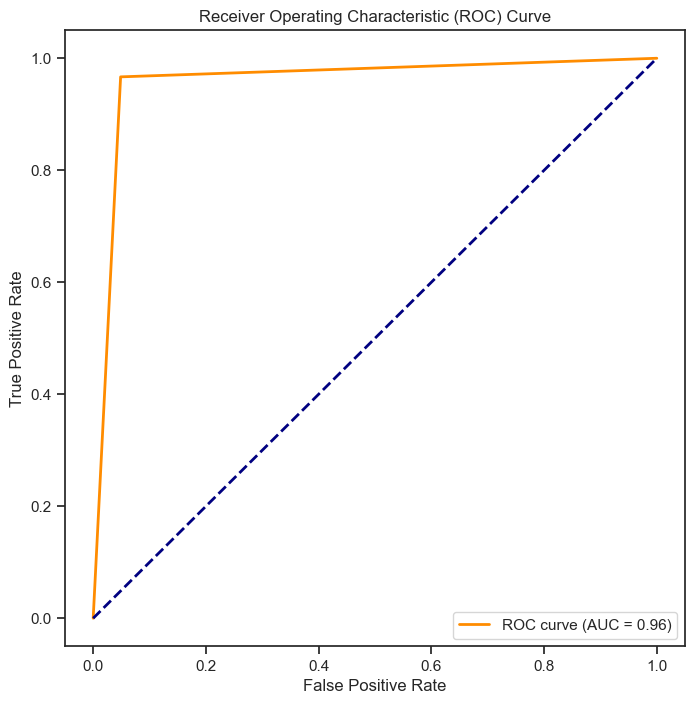

In [61]:
# Calculate the ROC curve for the testing set
fpr, tpr, thresholds = roc_curve(y_test, test_pred_gb)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, test_pred_gb)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [62]:
# Specify the file path where to save the model
model_file_path = 'gradient_boosting_classifier.pkl'

# Save the model to the specified file
with open(model_file_path, 'wb') as model_file:
    pickle.dump(gradient_boosting_classifier, model_file)

print(f"Gradient boosting classifier saved to {model_file_path}")

Gradient boosting classifier saved to gradient_boosting_classifier.pkl


In [63]:
test_pred_gb

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [64]:
# Define your single row of input data
input_feature = pd.DataFrame({
    "Species": [0],
    "Myco": [0],
    "AMF": [22.00],
    "Phenolics": [-0.56],
    "Lignin": [13.86],
    "NSC": [12.15],
    "Time": [14.0]
})

In [65]:
predictions = gradient_boosting_classifier.predict(input_feature)

In [66]:
print("Predicted Output:", predictions[0])

Predicted Output: 1
